## Classification with decision trees

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz 

from sklearn import tree, datasets, metrics, model_selection, preprocessing, pipeline

Load the data set

In [2]:
wine = datasets.load_wine()
# Wine recognition dataset - 3 classes
#print(wine.DESCR)

In [3]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

Stratify the data by the target label

train samples: 89
test samples 89


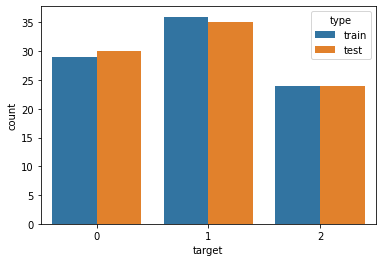

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, stratify=y)

df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.countplot(x='target', hue='type', data=df_set)     

print('train samples:', len(X_train))
print('test samples', len(X_test))

In [6]:
model = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', splitter='best', min_samples_split=2, min_impurity_decrease=0.0) 
# Hiperparametros
# criterion = ['gini', 'entropy', 'log_loss']
# splitter = ['best', 'random']
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, predicted)))
print("precision: {:.3f}".format(metrics.precision_score(y_test, predicted, average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(y_test, predicted, average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(y_test, predicted, average='weighted')))

accuracy: 0.888
precision: 0.889
recall: 0.888
f1 score: 0.888


In [7]:
predicted = model.predict(X_test)

confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
confusion_matrix

,0,1,2
0,25,5,0
1,3,31,1
2,0,1,23


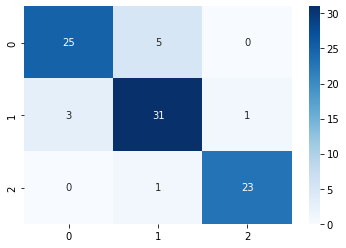

In [8]:
_ = sns.heatmap(confusion_matrix, annot=True, cmap="Blues")

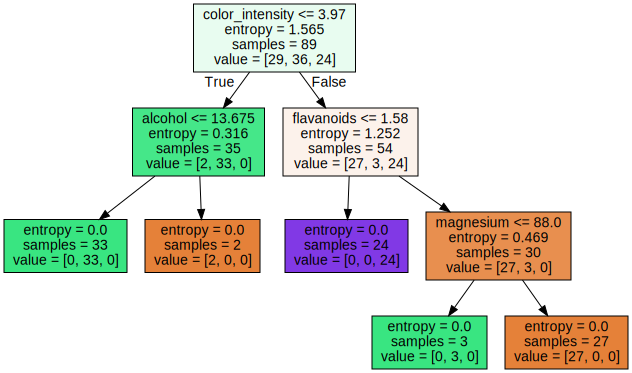

In [10]:
tree = graphviz.Source(tree.export_graphviz(model, out_file=None, feature_names=wine.feature_names, filled = True))
tree